In [2]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import Boosting.common_boosting as common_boosting
import TrainingCurves

import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [3]:
PLOT_PREFIX = "Figures/FACES_BOOSTING_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_BOOSTING"

In [4]:
# Load Data
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

In [6]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(), X_train, y_train, "accuracy")

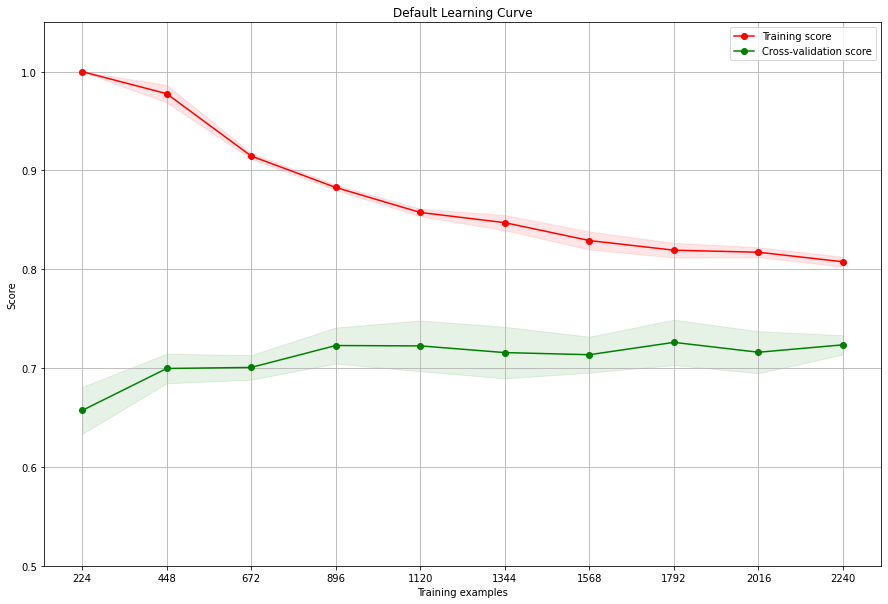

In [7]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [13]:
n_estimators = [i for i in range(1, 50)]
learning_rate = [i for i in np.arange(0.02, .8, 0.01)]
ccp_alpha = np.arange(0.0, 1.0, 0.01)
max_depth = [i for i in range(1, 25, 1)]

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i))
    post_pruning_labels.append(i)

max_depth_classifiers = []
max_depth_labels = []
for i in max_depth:
    max_depth_classifiers.append(tree.DecisionTreeClassifier(max_depth=i))
    max_depth_labels.append(i)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed: 10.0min finished


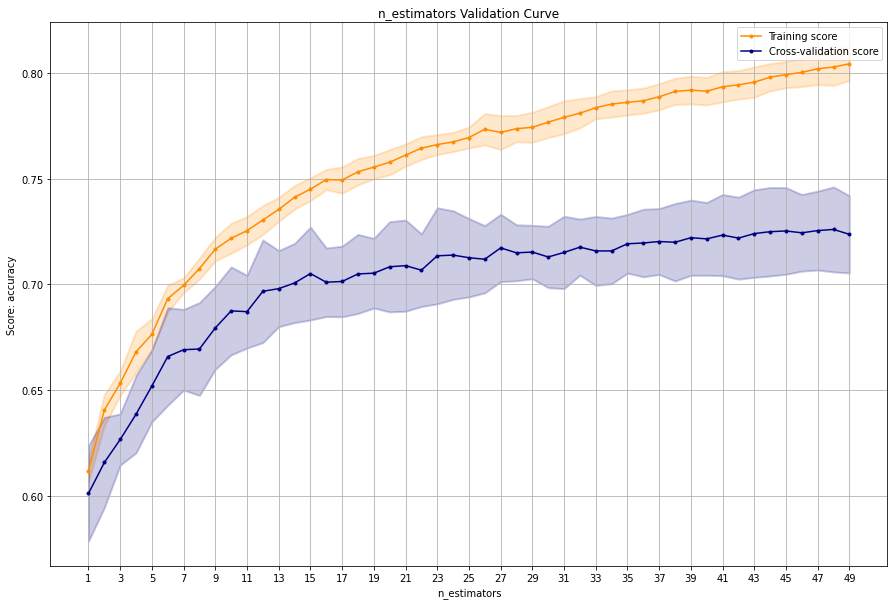

In [9]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "n_estimators", n_estimators, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=1)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_estimators", n_estimators, title="n_estimators Validation Curve", scoring="accuracy", tick_spacing=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed: 13.6min finished


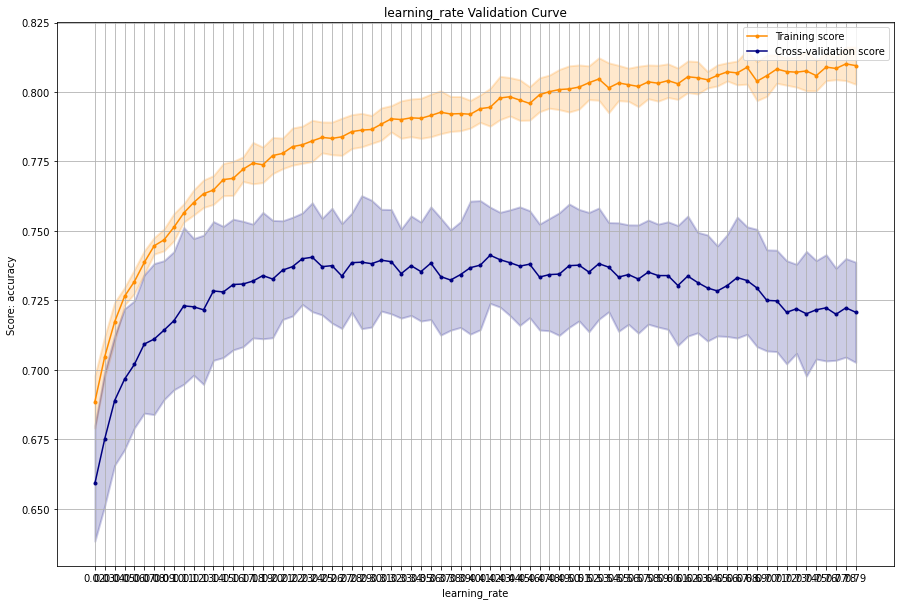

In [14]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "learning_rate", learning_rate, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate", learning_rate, title="learning_rate Validation Curve", scoring="accuracy", tick_spacing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 35.0min finished


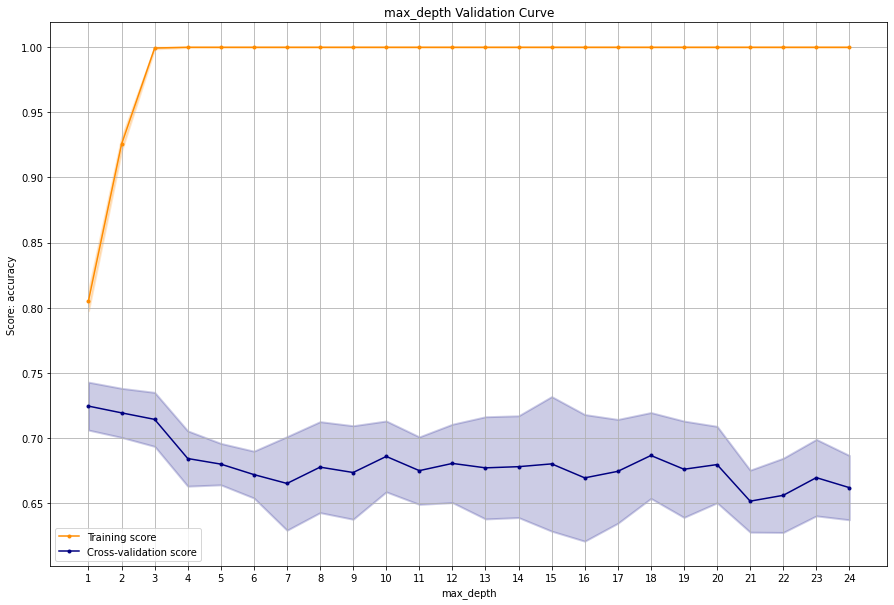

In [15]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", max_depth_classifiers, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth_labels, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 190.6min finished


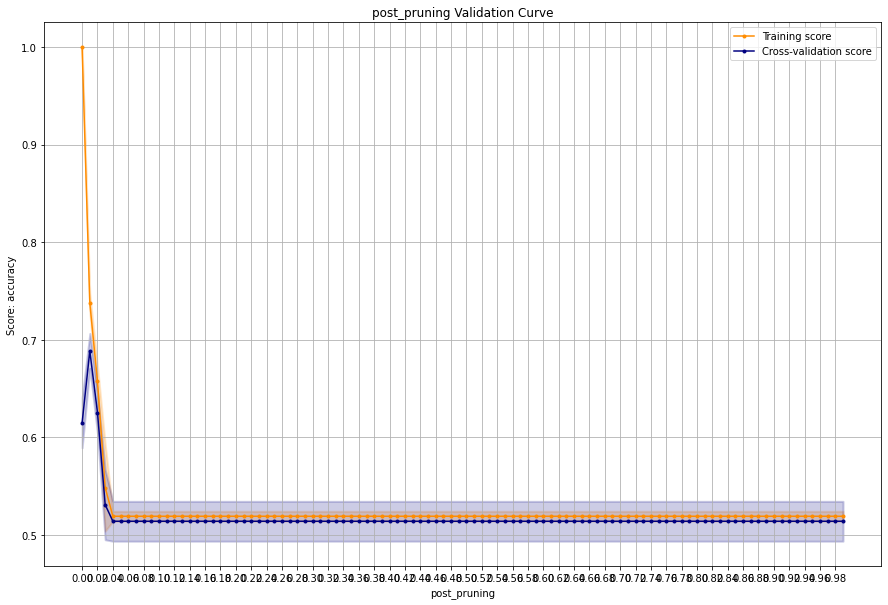

In [12]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title="post_pruning Validation Curve", scoring="accuracy", tick_spacing=2)

In [ ]:
params = {"n_neighbors": 35, "p":1}
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(**params), X_train, y_train, "accuracy")

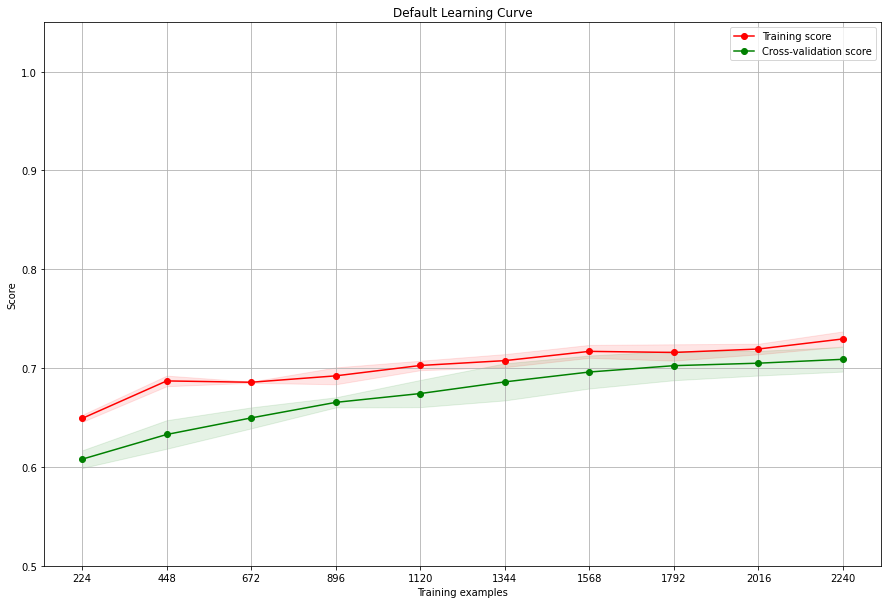

In [11]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [6]:
n_estimators = [i for i in range(1, 10)]
learning_rate = [i for i in np.arange(0.02, .3, 0.02)]
ccp_alpha = np.arange(0.0, 0.05, 0.001)

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    for depth in range(1, 4):
        post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=depth))
    post_pruning_labels.append(i)

parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'base_estimator': post_pruning_classifiers}

gs = common_boosting.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Plot saved as:  Figures/FACES_BOOSTING_TEST_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


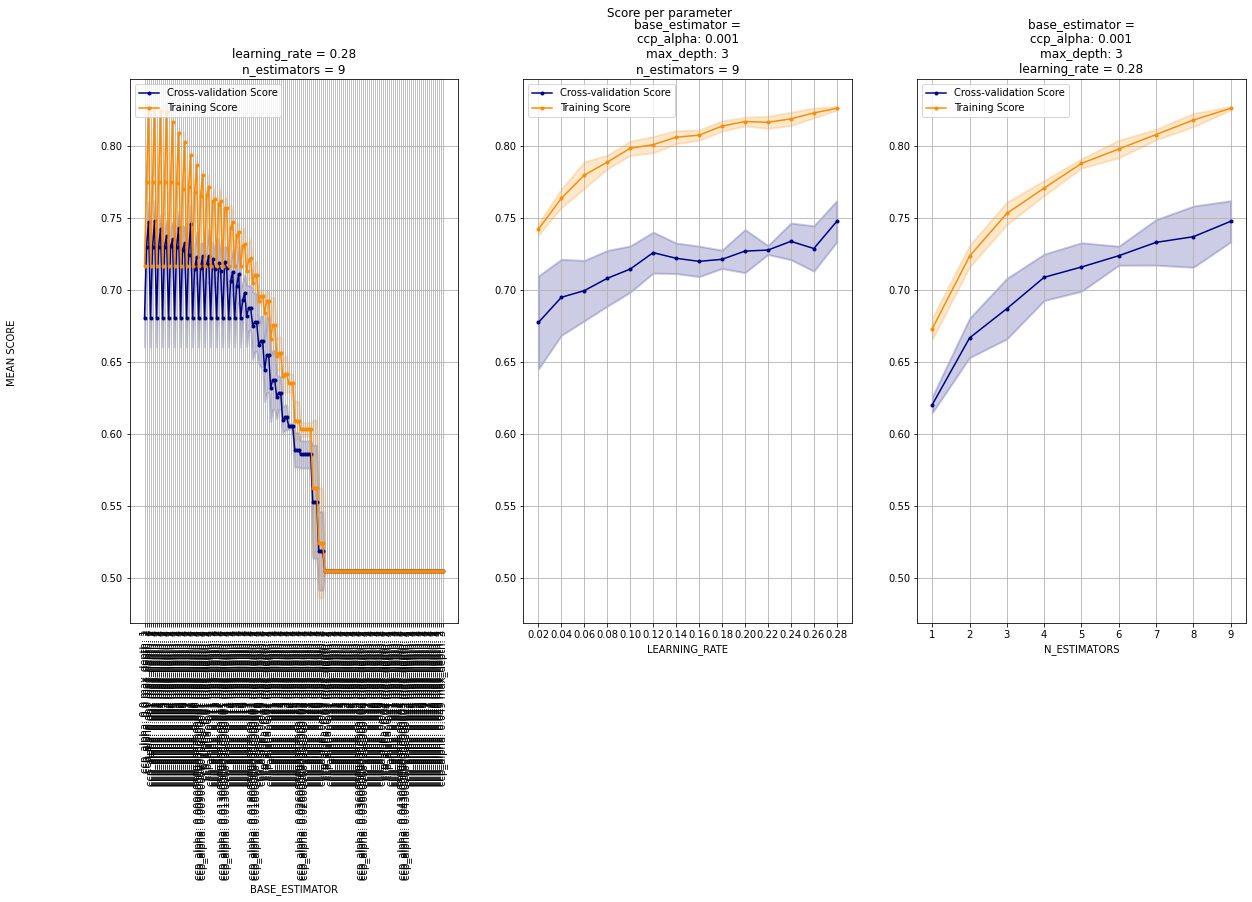

In [7]:
unused_params_values = {}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/FACES_BOOSTING_TEST_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


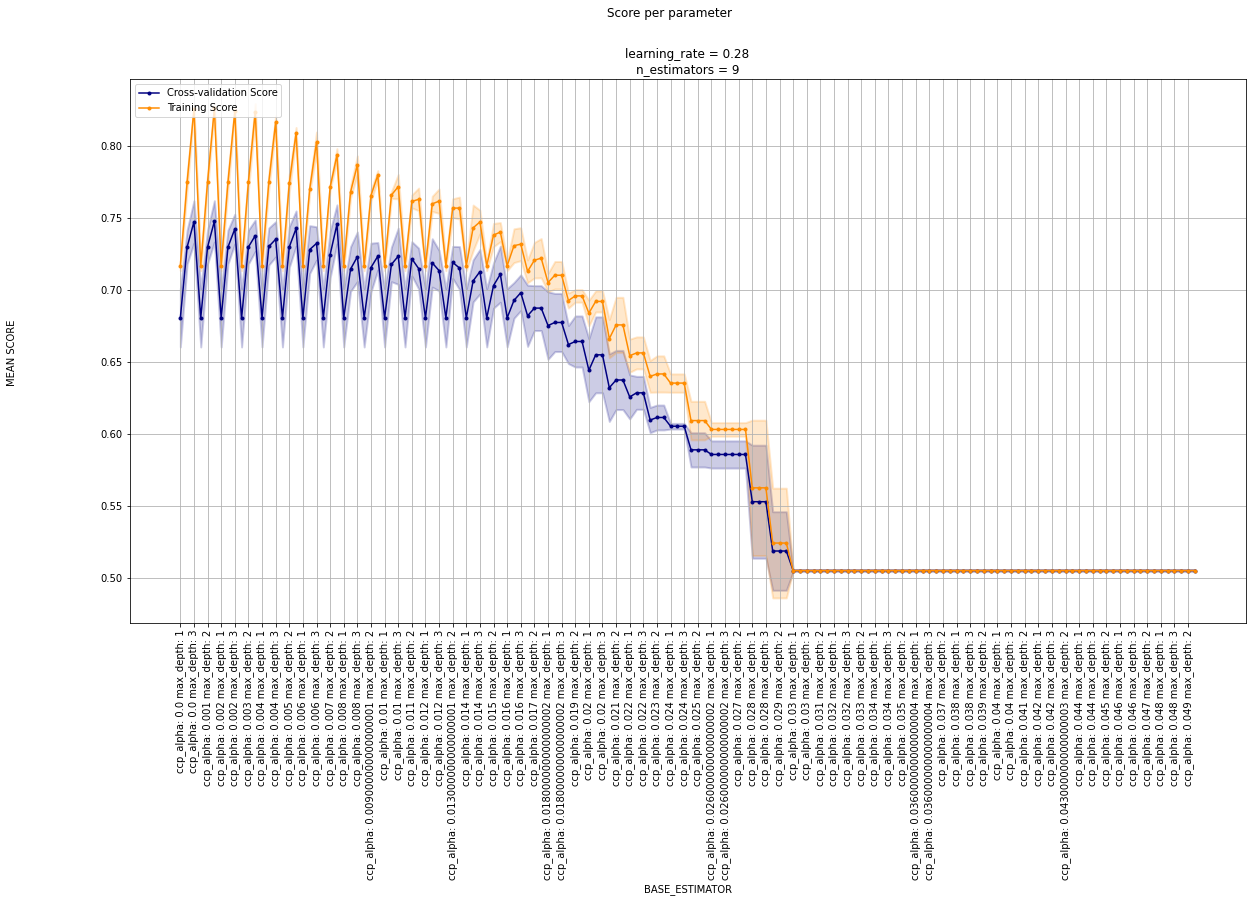

In [8]:
unused_params_values = None
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, PLOT_PREFIX, "base_estimator", unused_params_value_dict=unused_params_values, tick_spacing=2)